<a href="https://colab.research.google.com/github/datdinhstore99/AI-Expert-Roadmap/blob/disable_actions_on_PRs/Project_SegmentCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mô hình RFM và K-means phân khúc khách hàng

# Lý thuyết

Theo nguyên lý Pareto: 20% khách hàng sẽ mang lại 80% doanh số. Do đó doanh nghiệp cần xác định được những khách hàng quan trọng nhất để chăm sóc đặc biệt. Những tập khách hàng này được gọi là VIP, Priority hoặc khách hàng cao cấp, tùy từng doanh nghiệp có cách gọi khác nhau. Việc phân chia khách hàng thành các nhóm khác nhau dựa trên nhu cầu mua sắm sẽ giúp doanh nghiệp kinh doanh hiệu quả hơn, marketing target đến đúng tập khách hàng hơn, và khách hàng được phục vụ tốt hơn

**RFM định lượng giá trị của một khách hàng dựa trên 3 thông tin chính:**

Recency: Khoảng thời gian mua hàng gần đây nhất là bao lâu. Cho biết khách hàng có đang thực sự hoạt động gần thời điểm đánh giá. Chỉ số này càng lớn càng cho thấy xu hướng rời bỏ của khách hàng càng cao. Đó là một cảnh báo cho doanh nghiệp nên thay đổi sản phẩm để đáp ứng thị hiếu khách hàng hoặc thay đổi chính sách để nâng cao chất lượng phục vụ.

Frequency: Tần suất mua hàng của khách hàng. Nếu khách hàng mua càng nhiều đơn thì giá trị về doanh số mang lại cho công ty càng cao và tất nhiên giá trị của họ càng lớn. Tuy nhiên nếu chỉ xét dựa trên tần suất mua hàng thì cũng chưa đánh giá được đầy đủ mức độ tác động lên doanh thu bởi bên cạnh đó, giá trị đơn hàng cũng là yếu tố trực tiếp cho thấy khách hàng tiềm năng như thế nào.

Monetary: Là số tiền chi tiêu của khách hàng. Đây là yếu tố trực quan nhất ảnh hưởng tới doanh số. Hay nói cách khác, doanh nghiệp quan tâm nhất là khách hàng đã dành bao nhiêu tiền để mua sắm sản phẩm của công ty? Monetary sẽ tác động trực tiếp tới doanh thu và bị tác động gián tiếp thông qua 2 yếu tố còn lại là Recency và Frequency.

Sau khi đã có đầu vào là 3 nhân tố trên. Chúng ta sẽ sử dụng thuật toán K-Mean clustering, một thuật toán học không giám sát để nhóm các khách hàng có cùng mức độ VIP thành một nhóm. Nhưng trước đó chúng ta cần phải chuẩn hóa dữa liệu đầu vào.

**Tại sao cần chuẩn hóa dữ liệu đầu vào?**

Hãy tưởng tượng đơn vị của Recency là số ngày, của Frequency là số lần và của Monetary là số tiền. Khó khăn của mô hình học không giám sát là làm thế nào phân cụm chính xác những điểm dữ liệu được tạo thành từ những biến khác nhau về độ đo. Thông thường Monetary sẽ rất lớn so với Recency và Frequency nên trong không gian euclidean, yếu tố khoảng cách giữa các điểm đại diện cho 1 khách hàng sẽ ít bị tác động bởi Recency và Frequency hơn so với Monetary. Nếu không chuẩn hóa dữ liệu sẽ dẫn tới khoảng cách phần lớn bị ảnh hưởng bởi Monetary và ít bị ảnh hưởng bởi 2 biến còn lại.

**Tác dụng của chuẩn hóa dữ liệu**

Chuẩn hóa dữ liệu giúp đồng nhất đơn vị: Các nhân tố Recency, Frequency, Monetary sẽ không còn khác biệt về đơn vị. Giá trị của nhân tố này sẽ được đưa về cùng một miền biến thiên, phương sai và trung bình. Do đó vai trò của các biến trong việc xác định cụm là bình đẳng.

Các cụm sẽ tách biệt nhau hơn: Trước khi chuẩn hóa dữ liệu, nếu xét theo các trục Recency, Frequency thì các cụm sẽ rất gần nhau do giá trị Recency, Frequency là rất nhỏ. Sau khi chuẩn hóa dữ liệu, đơn vị là đồng nhất nên ranh giới giữa các cụm sẽ trở nên tách biệt.

Hạn chế các điểm dữ liệu outliers: Outliers hay còn gọi là điểm dị biệt, là một trong những nguyên nhân khiến thuật toán phân cụm bị bias (chệch). Dữ liệu outliers sẽ thường quá lớn hoặc quá nhỏ, điều này khiến khoảng cách giữa các điểm trở nên phân tán. Trong quá trình huấn luyện để thuật toán hội tụ về centroids (lõi) của từng clusters (cụm), do tác động của các outliers nên các centroids sẽ thường bị lệch cách xa các vị trí hội tụ lõi. Thuật toán cũng cần nhiều thời gian để hội tụ hơn. Việc này gây lãng phí về chi phí tính toán và chi phí thời gian. Do đó chúng ta cần chuẩn hóa dữ liệu để loại bỏ các outliers.

**Phương pháp chuẩn hóa dữ liệu**

Có rất nhiều phương pháp khác nhau để chuẩn hóa dữ liệu cho các biến Recency, Frequency, Monetary. Một trong những phương pháp được sử dụng phổ biến nhất là chia độ lớn của các biến theo rank. Chẳng hạn Recency, Frequency, Monetary sẽ được chia thành 5 ranks hoặc 10 ranks tùy theo mục tiêu và định nghĩa từ trước về thang đo. Trong trường hợp bạn muốn chấm điểm khách hàng của mình chi tiết hơn, lựa chọn 10 ranks sẽ phù hợp hơn. Trái lại, bạn muốn các nhóm khái quát hơn thì lựa chọn rank 5 sẽ hợp lý hơn. Ngoài ra, các biến cũng nên cùng khoảng rank (cùng là 5 hoặc 10) để đồng nhất mức độ tác động lên rank tổng hợp của khách hàng. Không nên chọn Recency, Frequency, Monetary mỗi biến một khoảng rank.

**Tính rank cho một khách hàng**

Rank của một khách hàng sẽ được tính bằng trung bình cộng của 3 giá trị rank của Recency, Frequency và Monetary. Gía trị này càng cao thì khách hàng của chúng ta càng có giá trị đối với công ty.

Để mapping được giá trị của một biến cụ thể sang rank, rất đơn giản chúng ta sẽ sử dụng hàm pandas.qcut() với giá trị khai báo là số lượng ranks cần chia. Chẳng hạn cần tạo ranks 10 thì truyền vào pandas.qcut(10). Hàm qcut() sẽ tự động tìm ra các khoảng giá trị sao cho số lượng các quan sát được chia đều vào mỗi khoảng. Bạn có thể lựa chọn giá trị mapping là một số nguyên bất kì ứng với mỗi rank thông qua thiết lập tham số labels = False hoặc giữ nguyên labels là các khoảng khi labels = True. Cụ thể xem hướng dẫn về hàm pandas.qcut().

Lưu ý một số trường hợp bạn sử dụng hàm pandas.qcut() và gặp lỗi bins edge duplicate. Tức điểm đầu và điểm cuối của các khoảng bằng nhau. Có thể solve vấn đề như hướng dẫn stackoverflow - qcut non unique bin edges.

**Thực hiện customer segmentation**

Phân khúc khách hàng có thể được thực hiện thông qua nhiều phương pháp khác nhau.

Tính trung bình rank các biến: Một cách khá đơn giản là tính trung bình ranks của các biến ta thu được giá trị rank tổng hợp ứng với mỗi khách hàng. Ta có thể giữ nguyên mỗi rank tổng hợp là một nhóm hoặc gộp nhiều rank thành một nhóm theo khoảng giá trị như bên dưới:
Khách hàng VIP: rank từ 8-10.
Khách hàng đại chúng: rank từ 5-7.
Khách hàng thứ cấp: rank < 5.
Sử dụng thuật toán K-mean clustering để phân cụm các khách hàng dựa vào input là 3 biến giá trị ranks của Recency, Frequency, Monetary. Theo cách này ta sẽ tự động phân cụm toàn bộ khách hàng về 3 nhóm mà không cần phải tạo khoảng rank. Tuy nhiên hạn chế là các clustering không có một định nghĩa rõ ràng (VIP, đại chúng, thứ cấp). Chúng ta có thể cần thêm một bước đặt tên cho các nhóm này dựa trên phân tích centroid để tìm ra đặc tính của từng nhóm. Ngoài ra việc xác định số lượng nhóm để phân cụm cũng là một vấn đề của thuật toán. Khi đó ta sẽ cần quan sát biểu đồ sai số MRSE để tìm ra điểm elbow. Kĩ thuật này tôi sẽ không trình bày quá chi tiết trong bài viết, bạn đọc có thể search rất nhiều tài liệu trên mạng để tìm hiểu thêm.

**Đổi dấu để đảm bảo tính đồng biến với rank khách hàng**

Ta biết rằng rank của khách hàng càng cao thì khách hàng đó càng VIP. Một số trường hợp biến đầu vào có thể ngược chiều với rank, chính vì vậy ta sẽ phải điều chỉnh lại dấu các biến sao cho chúng đồng biến với rank để phản ánh đúng rank càng cao thì khách hàng càng VIP. Nhận thấy rằng biến Recency có quan hệ ngược chiều vì khách hàng càng lâu mua hàng (tương ứng với Recency lớn) thì xếp hạng khách hàng càng thấp. Do đó ta sẽ cần phải đổi dấu sang âm để rank của biến tỷ lệ thuận với rank của khách hàng.

Nếu không để ý tới yếu tố đồng biến thì có thể bạn sẽ tạo ra những mô hình kém chất lượng. Khi đó hậu quả cũng siêu to khổng lồ lắm. Sẽ có vài câu chuyện cười như sau: Tập khách hàng VIP là những khách thu nhập 5-6 triệu/tháng và được suggest tivi 50 triệu, trong khi khách hàng thu nhập vài trăm triệu/tháng rơi vào tập thứ cấp nên được suggest tivi 5 triệu.

# Thực Hành

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hệ thống thông minh/dataset/data.csv', encoding='unicode_escape')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Loại bỏ bản ghi null
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Doanh thu United Kingdom:  6767873.394002574
Doanh thu cac khu vực khác:  1532192.4199999971


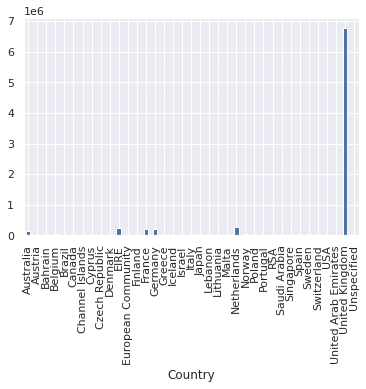

In [6]:
df['Country'].value_counts()

df['Value'] = df['Quantity'] * df['UnitPrice']

df_money = df.groupby('Country').Value.sum().to_frame()

dem = 0 

for i in df_money['Value']:
    dem += i

print("Doanh thu United Kingdom: ",df_money['Value']['United Kingdom'])
print("Doanh thu cac khu vực khác: ",dem - df_money['Value']['United Kingdom'])

df_money['Value'].plot(kind='bar')

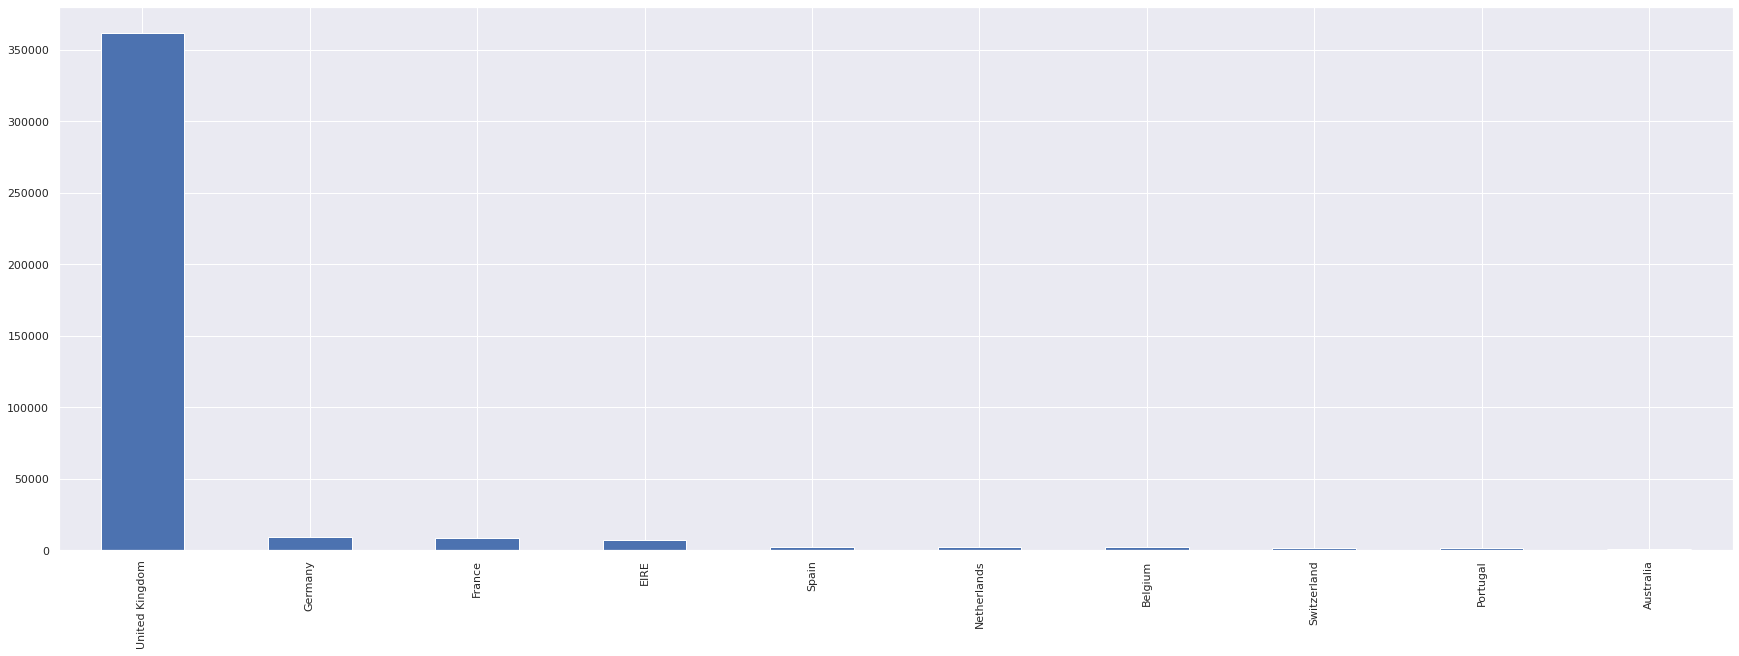

In [7]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=30)
df['Country'].value_counts()[:10].plot(kind='bar')

In [8]:
# Do united kingdom có lượng khách hàng chiếm số lượng lớn, nên chỉ phân tích ở vùng này
df = df[df.Country=='United Kingdom']

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,Value
count,361878.000000,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368,18.702086
std,263.129266,70.654731,1594.402590,451.918484
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,14194.000000,3.750000
50%,4.000000,1.950000,15514.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [10]:
# Lọc bỏ bản ghi có quantity âm
df = df[df.Quantity>0]

In [11]:
df = df[['InvoiceNo', 'Quantity', 'InvoiceDate', 'CustomerID', 'UnitPrice']]

In [12]:
df.CustomerID.nunique()

3921

**Tính Recency**

In [13]:
# Tìm thời điểm mua hàng gần nhất của khách hàng
dfRecentOrder = pd.pivot_table(data=df,
                               index=['CustomerID'],
                               values=['InvoiceDate'],
                               aggfunc={'InvoiceDate': max})
# đổi tên cột mới tạo ra
dfRecentOrder.columns = ['RecentOrderDate']
dfRecentOrder

,RecentOrderDate
CustomerID,
12346.0,2011-01-18 10:01:00
12747.0,2011-12-07 14:34:00
12748.0,2011-12-09 12:20:00
12749.0,2011-12-06 09:56:00
12820.0,2011-12-06 15:12:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [14]:
# Tạo RMF_df để lưu dần thông tin R, M, F của Customer
RMF_df = dfRecentOrder.reset_index()
RMF_df

,CustomerID,RecentOrderDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00
...,...,...
3916,18280.0,2011-03-07 09:52:00
3917,18281.0,2011-06-12 10:53:00
3918,18282.0,2011-12-02 11:43:00
3919,18283.0,2011-12-06 12:02:00


In [15]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541889   2011-12-09 12:31:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541892   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: InvoiceDate, Length: 354345, dtype: datetime64[ns]

In [16]:
dateNow = df['InvoiceDate'].max() + pd.DateOffset(days=1)
dateNow

Timestamp('2011-12-10 12:49:00')

In [17]:
RMF_df['Recency'] = RMF_df['RecentOrderDate'].apply(lambda x: (dateNow - x).days)
del RMF_df['RecentOrderDate']
RMF_df

,CustomerID,Recency
0,12346.0,326
1,12747.0,2
2,12748.0,1
3,12749.0,4
4,12820.0,3
...,...,...
3916,18280.0,278
3917,18281.0,181
3918,18282.0,8
3919,18283.0,4


**Tinh Frequency**

In [18]:
df.groupby('InvoiceNo').count()

,Quantity,InvoiceDate,CustomerID,UnitPrice
InvoiceNo,,,,
536365,7,7,7,7
536366,2,2,2,2
536367,12,12,12,12
536368,4,4,4,4
536369,1,1,1,1
...,...,...,...,...
581582,2,2,2,2
581583,2,2,2,2
581584,2,2,2,2


In [19]:
dfFrequency = df.groupby('CustomerID').InvoiceNo.count().to_frame()
dfFrequency.columns = ['Frequency']
RMF_df = pd.merge(RMF_df, dfFrequency.reset_index(), on='CustomerID')
RMF_df


,CustomerID,Recency,Frequency
0,12346.0,326,1
1,12747.0,2,103
2,12748.0,1,4596
3,12749.0,4,199
4,12820.0,3,59
...,...,...,...
3916,18280.0,278,10
3917,18281.0,181,7
3918,18282.0,8,12
3919,18283.0,4,756


**Tính Monetary**

In [20]:
df['Value'] = df['Quantity'] * df['UnitPrice']

dfMonetary = df.groupby('CustomerID').Value.sum().to_frame()
dfMonetary.columns = ['Monetary']
RMF_df = pd.merge(RMF_df, dfMonetary, on='CustomerID')
RMF_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,1,4596,33719.73
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3916,18280.0,278,10,180.60
3917,18281.0,181,7,80.82
3918,18282.0,8,12,178.05
3919,18283.0,4,756,2094.88


In [21]:
# đổi dấu Recency
RMF_df.Recency = -RMF_df.Recency

Ta can mapping cac gia tri truong Recency, Frequency, Monetary voi rank tuong ung trong nguong rank la 10

In [22]:
# hàm qcut - tương tự tứ phân vị, chia phân phối thành các khoảng có diện tích bằng nhau
# Lưu ý một số trường hợp bạn sử dụng hàm pandas.qcut() và gặp lỗi 
# bins edge duplicate. Tức điểm đầu và điểm cuối của các khoảng bằng nhau. 
# Có thể solve vấn đề như hướng dẫn stackoverflow - qcut non unique bin edges --> sử dụng rank(method='first')
orderFrequency = RMF_df['Frequency'].rank(method='first')
RMF_df['rFrequency'] = pd.qcut(orderFrequency, 10, labels = False)
# labels=False --> chỉ định kết quả là số chứ k phải khoảng

orderRecency = RMF_df['Recency'].rank(method='first')
RMF_df['rRecency'] = pd.qcut(orderRecency, 10, labels = False)

orderMonetary = RMF_df['Monetary'].rank(method='first')
RMF_df['rMonetary'] = pd.qcut(orderMonetary, 10, labels = False)

# df[['rRecency', 'rMonetary', 'rFrequency']] = df[['Recency', 'Monetary', 'Frequency']].apply(lambda x: pd.qcut(x, 10, labels=False))
RMF_df['rank'] = (RMF_df.rRecency + RMF_df.rFrequency + RMF_df.rMonetary)/3
RMF_df['FinalRank'] = RMF_df['rank'].apply(int)
RMF_df

,CustomerID,Recency,Frequency,Monetary,rFrequency,rRecency,rMonetary,rank,FinalRank
0,12346.0,-326,1,77183.60,0,0,9,3.000000,3
1,12747.0,-2,103,4196.01,7,9,9,8.333333,8
2,12748.0,-1,4596,33719.73,9,9,9,9.000000,9
3,12749.0,-4,199,4090.88,8,9,9,8.666667,8
4,12820.0,-3,59,942.34,6,9,6,7.000000,7
...,...,...,...,...,...,...,...,...,...
3916,18280.0,-278,10,180.60,1,0,1,0.666667,0
3917,18281.0,-181,7,80.82,1,1,0,0.666667,0
3918,18282.0,-8,12,178.05,1,8,1,3.333333,3
3919,18283.0,-4,756,2094.88,9,9,8,8.666667,8


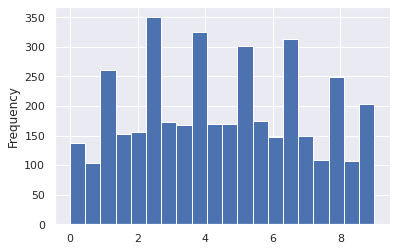

In [23]:
RMF_df['rank'].plot.hist(bins=20)

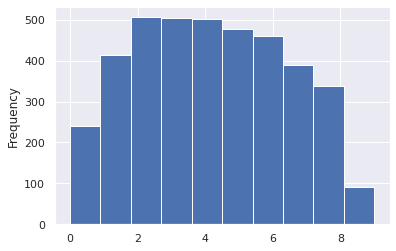

In [24]:
RMF_df['FinalRank'].plot.hist(bins=10)

K-means Clustering Algorithm

1. Thiết lập số của K các cụm
2. Khởi tạo các điểm trung tâm bằng xáo trộn nhanh của dữ liệu và ngẫu nhiên lựa chon k các điểm dữ liệu từ các trung tâm không thay thế
3. giữ cho số vòng lặp tới khi không thay đổi các điểm trung tâm

1.Xử lý ngoại lệ

In [25]:
RMF_df.head()

,CustomerID,Recency,Frequency,Monetary,rFrequency,rRecency,rMonetary,rank,FinalRank
0,12346.0,-326,1,77183.60,0,0,9,3.000000,3
1,12747.0,-2,103,4196.01,7,9,9,8.333333,8
2,12748.0,-1,4596,33719.73,9,9,9,9.000000,9
3,12749.0,-4,199,4090.88,8,9,9,8.666667,8
4,12820.0,-3,59,942.34,6,9,6,7.000000,7


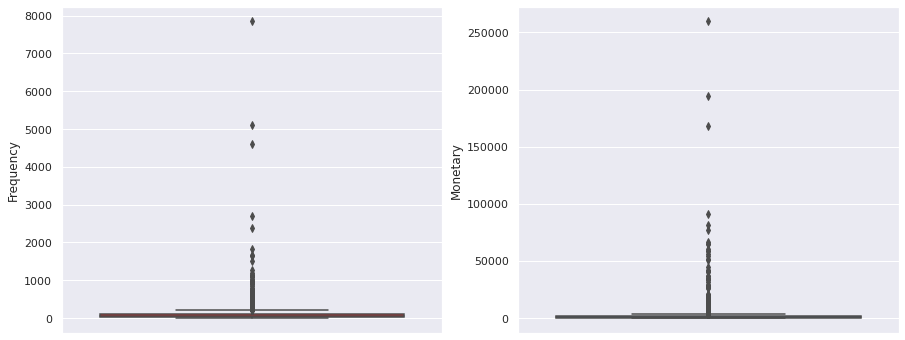

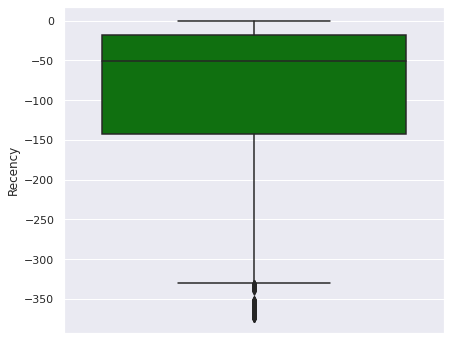

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=RMF_df["Frequency"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=RMF_df["Monetary"])
plt.show()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=RMF_df["Recency"], color="green")
plt.show()

In [27]:
Q1 = RMF_df.Recency.quantile(0.25)
Q3 = RMF_df.Recency.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

-143.0
-18.0
125.0


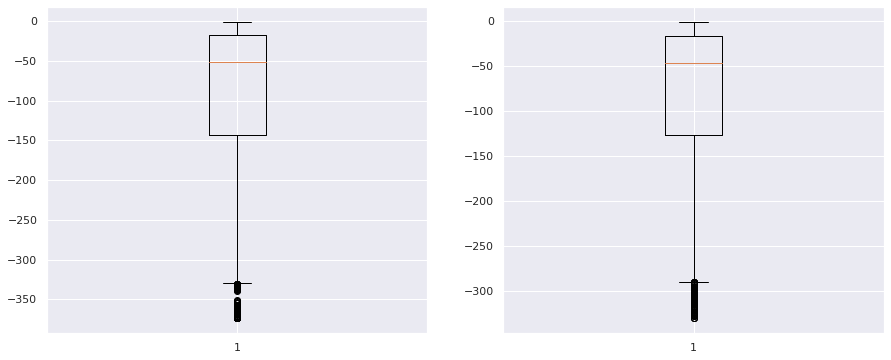

In [28]:
# outlier treatment for Recency
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(RMF_df.Recency)
Q1 = RMF_df.Recency.quantile(0.25)
Q3 = RMF_df.Recency.quantile(0.75)
IQR = Q3 - Q1
RMF_RO = RMF_df[(RMF_df.Recency >= (Q1 - 1.5*IQR)) & (RMF_df.Recency <= (Q3 + 1.5*IQR))]
plt.subplot(1,2,2)
plt.boxplot(RMF_RO.Recency)
plt.show()


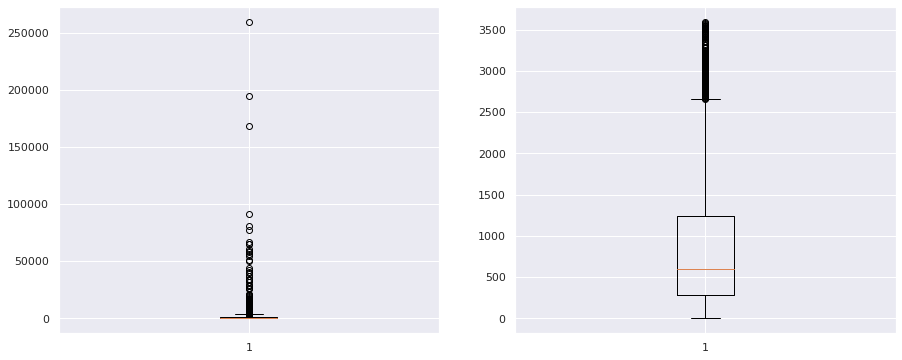

In [29]:
# outlier treatment for Monetary
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(RMF_RO.Monetary)
Q1 = RMF_RO.Monetary.quantile(0.25)
Q3 = RMF_RO.Monetary.quantile(0.75)
IQR = Q3 - Q1
RMF_RO = RMF_RO[(RMF_RO.Monetary >= (Q1 - 1.5*IQR)) & (RMF_RO.Monetary <= (Q3 + 1.5*IQR))]
plt.subplot(1,2,2)
plt.boxplot(RMF_RO.Monetary)
plt.show()

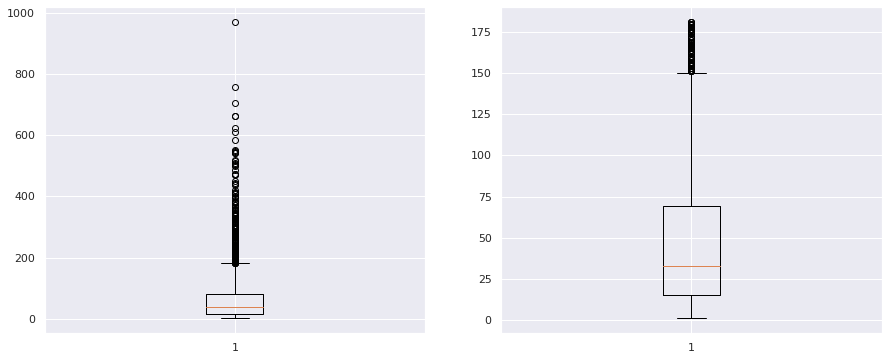

In [30]:
# outlier treatment for Frequency
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(RMF_RO.Frequency)
Q1 = RMF_RO.Frequency.quantile(0.25)
Q3 = RMF_RO.Frequency.quantile(0.75)
IQR = Q3 - Q1
RMF_RO = RMF_RO[(RMF_RO.Frequency >= (Q1 - 1.5*IQR)) & (RMF_RO.Frequency <= (Q3 + 1.5*IQR))]
plt.subplot(1,2,2)
plt.boxplot(RMF_RO.Frequency)
plt.show()

**Scaling data**

In [31]:
RMF_norm1 = RMF_RO[['Recency', 'Frequency', 'Monetary']]

In [32]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RMF_norm1 = standard_scaler.fit_transform(RMF_norm1)

In [33]:
RMF_norm1[2]

array([ 0.24922124, -0.03670097,  0.21519191])

In [34]:
# hàm qcut - tương tự tứ phân vị, chia phân phối thành các khoảng có diện tích bằng nhau
# Lưu ý một số trường hợp bạn sử dụng hàm pandas.qcut() và gặp lỗi 
# bins edge duplicate. Tức điểm đầu và điểm cuối của các khoảng bằng nhau. 
# Có thể solve vấn đề như hướng dẫn stackoverflow - qcut non unique bin edges --> sử dụng rank(method='first')
orderFrequency = RMF_RO['Frequency'].rank(method='first')
RMF_RO['rFrequency'] = pd.qcut(orderFrequency, 160, labels = False)
# labels=False --> chỉ định kết quả là số chứ k phải khoảng

orderRecency = RMF_RO['Recency'].rank(method='first')
RMF_RO['rRecency'] = pd.qcut(orderRecency, 300, labels = False)

orderMonetary = RMF_RO['Monetary'].rank(method='first')
RMF_RO['rMonetary'] = pd.qcut(orderMonetary, 2500, labels = False)

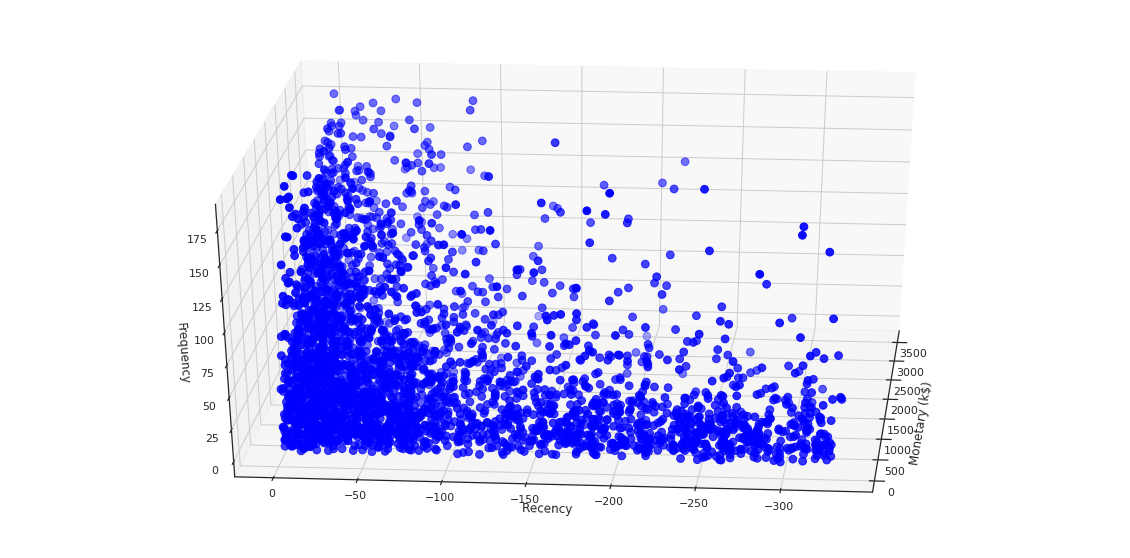

In [48]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RMF_RO.Monetary, RMF_RO.Recency,RMF_RO.Frequency , c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Monetary (k$)")
plt.ylabel('Recency ')
ax.set_zlabel("Frequency")
plt.show()

Thay vì chuẩn hóa tôi chỉ lọc ra các điểm nhiễu

In [42]:
RMF_RO.iloc[:,4:7]

,rFrequency,rRecency,rMonetary
4,111,288,1771
5,12,43,86
6,97,129,1775
7,9,122,2204
8,63,146,1002
...,...,...,...
3915,24,126,354
3916,27,16,378
3917,18,59,67
3918,33,275,366


Tiếp theo, tôi vẽ biểu đồ Trong Cụm Tổng Bình phương (WCSS) với số lượng cụm (Giá trị K) để tìm ra số lượng giá trị cụm tối ưu. WCSS đo lường tổng khoảng cách của các quan sát từ trung tâm cụm của chúng, được đưa ra bởi công thức dưới đây.

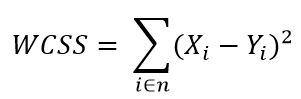

nơi  Yi  là trung tâm để quan sát  Xi . Mục tiêu chính là tối đa hóa số lượng cụm và trong trường hợp hạn chế, mỗi điểm dữ liệu trở thành trung tâm cụm của chính nó.

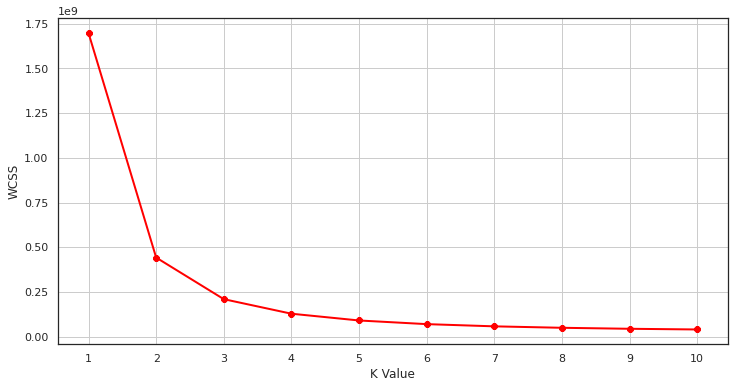

In [44]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0).fit(RMF_RO.iloc[:,4:7])
    centroid = kmeans.cluster_centers_
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

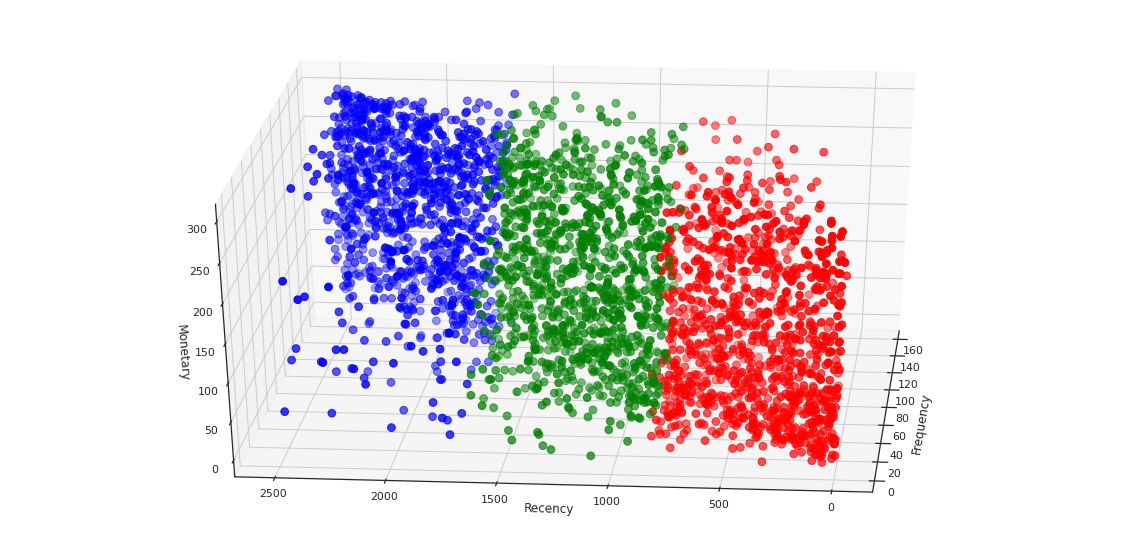

In [43]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(RMF_RO.iloc[:,4:7])

RMF_RO["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RMF_RO.rFrequency[RMF_RO.label == 0], RMF_RO.rMonetary[RMF_RO.label == 0], RMF_RO.rRecency[RMF_RO.label == 0], c='blue', s=60)
ax.scatter(RMF_RO.rFrequency[RMF_RO.label == 1], RMF_RO.rMonetary[RMF_RO.label == 1], RMF_RO.rRecency[RMF_RO.label == 1], c='red', s=60)
ax.scatter(RMF_RO.rFrequency[RMF_RO.label == 2], RMF_RO.rMonetary[RMF_RO.label == 2], RMF_RO.rRecency[RMF_RO.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Frequency")
plt.ylabel("Recency")
ax.set_zlabel('Monetary')
plt.show()
